<a href="https://colab.research.google.com/github/brunomarschuck/2022PythonChick/blob/main/4%EC%A3%BC%EC%B0%A8%EB%AF%B8%EC%85%98(%EB%B8%8C%EB%A3%A8%EB%85%B8%EB%A7%88%EB%A5%B4%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. 한글 설치*

- 왼쪽에 있는 목차 보시면 더 편하게 보실 수 있습니다

In [ ]:
# 한글 설치
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'NanumGothic')

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# *1. 데이터 준비(깃허브)*

In [ ]:
!git clone https://github.com/brunomarschuck/2022dataset.git

fatal: destination path '2022dataset' already exists and is not an empty directory.


In [ ]:
ls

2022dataset/  sample_data/


In [ ]:
cd 2022dataset

/content/2022dataset


In [ ]:
ls

age2012.csv  age2022.csv  우리반명단.csv


# *2. 지역 간 인구 구조 비교*


- 입력한 지역끼리 비교하는 것을 1)로, 입력한 지역과 인구구조가 가장 유사한 지역을 찾는 것을 2로 만들었다.

### 1) 입력한 지역끼리 비교하기

- 두 지역을 입력하면 인구 구조를 그래프로 비교한다.
- 꺾은선그래프로 연령별 '인구 수'와 '인구 비율'을 비교하고, 파이그래프로 두 지역의 연령대별 인구 차이를 보여준다.

두 지역의 인구 구조를 비교합니다.
첫번째 지역을 입력해주십시오. ex) 서울, 서구, 동송읍 : 둔산2동
두번째 지역을 입력해주십시오. ex) 서울, 서구, 동송읍 : 동송읍

---------------------------------------------------
두 도시의 연령별 인구 수와 인구 비율을 비교합니다.



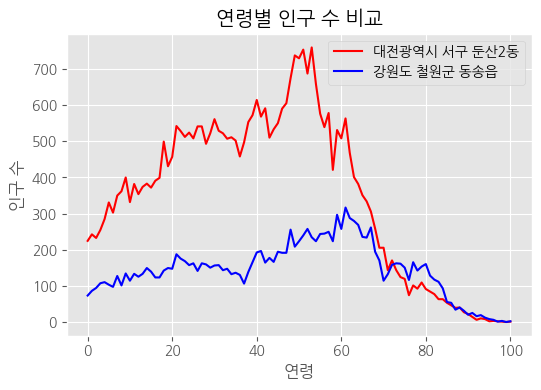

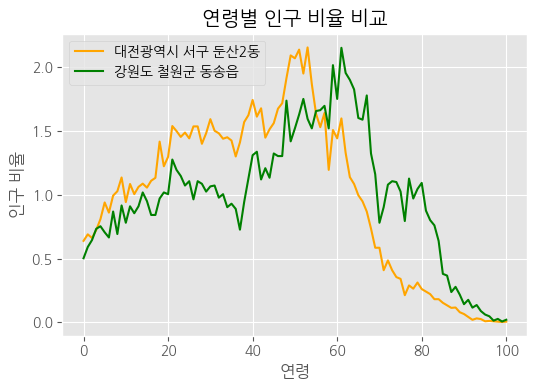


---------------------------------------------------
두 도시의 연령대별 인구 비율을 비교합니다.



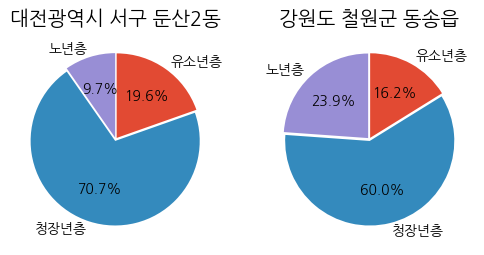

In [ ]:
import csv
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 데이터 불러오기
data = csv.reader(open('age2022.csv'))
next(data)
data = list(data)

# 비교할 데이터 선택
print('두 지역의 인구 구조를 비교합니다.')
name1 = input('첫번째 지역을 입력해주십시오. ex) 서울, 서구, 동송읍 : ')
name2 = input('두번째 지역을 입력해주십시오. ex) 서울, 서구, 동송읍 : ')

# 리스트 생성
result1 = []                   # 인구 수
result2 = []                  
prop1 = []                     # 인구 비율
prop2 = []
young1 = []                    # 유소년층
young2 = []
adult1 = []                    # 청장년층
adult2 = []
old1 = []                      # 노년층
old2 = []

# 데이터 작업
for row in data :
  if name1 in row[0] :
    result1 = []                                    # 인구 수
    prop1 = []                                      # 인구 비율
    for i in range(3,len(row)) :
      result1.append(int(row[i]))
      prop1.append(100 * int(row[i])/int(row[2]))   # 퍼센트
    result1_name = row[0].split('(')[0]             # 법정 지역명

    for i in range(3, 23) :       #19세 이하 인구
      young1.append(int(row[i]))
    for i in range(23, 68) :      #20세~64세 인구
      adult1.append(int(row[i]))
    for i in range(68, 104) :     #65세 이상 인구
      old1.append(int(row[i]))
    break

for row in data :
  if name2 in row[0] :
    result2 = []
    prop2 = []
    for i in range(3,len(row)) :
      result2.append(int(row[i]))
      prop2.append(100 * int(row[i])/int(row[2]))
    result2_name = row[0].split('(')[0]   

    for i in range(3, 23) :       
      young2.append(int(row[i]))
    for i in range(23, 68) :     
      adult2.append(int(row[i]))
    for i in range(68, 104) :     
      old2.append(int(row[i]))
    break



## 그래프 및 결과 도출
print('\n---------------------------------------------------')
print('두 도시의 연령별 인구 수와 인구 비율을 비교합니다.\n')
# 인구 수 비교
plt.figure(dpi = 100)
plt.title('연령별 인구 수 비교')
plt.xlabel('연령')
plt.ylabel('인구 수')
plt.plot(result1, c = 'red', label = result1_name)
plt.plot(result2, c = 'blue', label = result2_name)
plt.legend()
plt.show()

# 인구 비율 비교
plt.figure(dpi = 100)
plt.title('연령별 인구 비율 비교')
plt.xlabel('연령')
plt.ylabel('인구 비율')
plt.plot(prop1, c = 'orange', label = result1_name)
plt.plot(prop2, c = 'green', label = result2_name)
plt.legend()
plt.show()

# 연령대별 인구 차이 출력(원그래프)
print('\n---------------------------------------------------')
print('두 도시의 연령대별 인구 비율을 비교합니다.\n')
x = ['유소년층','청장년층', '노년층']
y1 = [sum(young1), sum(adult1), sum(old1)]
y2 = [sum(young2), sum(adult2), sum(old2)]
explode = [0.02] *3

plt.figure(dpi = 100)
plt.subplot(121)
plt.title(result1_name)
plt.pie(y1, labels = x, autopct = '%.1f%%', startangle = 90, counterclock = False, explode = explode)

plt.subplot(122)
plt.title(result2_name)
plt.pie(y2, labels = x, autopct = '%.1f%%', startangle = 90, counterclock = False, explode = explode)
plt.show()

### 2) 입력한 지역과 인구구조가 가장 유사한 지역 찾기

> (현재 vs 현재 / 현재 vs 과거)

- 지역을 입력하고, 현재나 과거를 선택하면 인구 구조를 그래프로 비교한다.
- 클래스101 강의에서처럼 '인구 수'가 아닌 연령별 '인구 비율'을 사용했다.

인구 구조를 비교합니다.
현재의 데이터끼리 비교하시려면 1, 현재와 과거의 데이터를 비교하시려면 2를 입력하세요 [1, 2] : 3
------------------------------------------------------------------------------------------------
숫자 1 이나 2 만 입력하세요
----------------------------
현재의 데이터끼리 비교하시려면 1, 현재와 과거의 데이터를 비교하시려면 2를 입력하세요 [1, 2] : 2
------------------------------------------------------------------------------------------------
우리는 과거의 경험으로 미래에 대비할 수 있습니다.
우리 지역의 인구구조는 어느 지역의 10년 전 인구구조와 가장 비슷할까요?
궁금한 지역 이름을 입력해주세요 ex) 송파구, 신도림동 : 서귀포
붉은색은 입력한 지역, 푸른색은 10년 전 인구구조가 입력 지역의 현재 인구구조와 가장 비슷한 지역입니다.



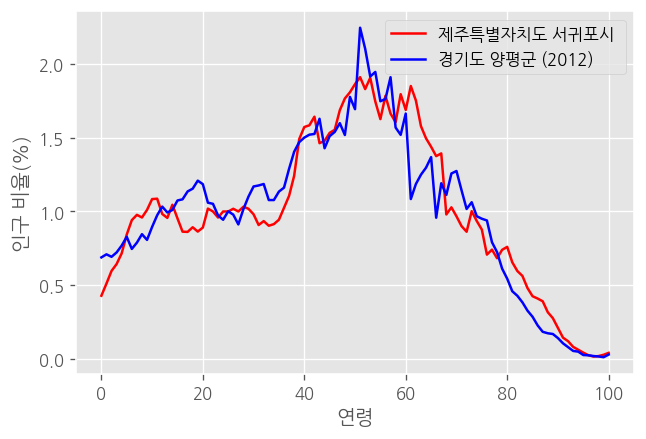


<제주특별자치도 서귀포시 >의 인구구조는 10년 전 <경기도 양평군 >의 인구구조와 가장 비슷합니다.
--------------------------------------------------------------------------------------------------


In [ ]:
# 초기 설정
import csv
import time
import matplotlib.pyplot as plt
plt.figure(dpi = 100)
plt.style.use('ggplot')
plt.xlabel('연령')
plt.ylabel('인구 비율(%)')

# 데이터 불러오기
data1 = csv.reader(open('age2022.csv'))
data2 = csv.reader(open('age2012.csv'))
next(data1)
next(data2)
data1 = list(data1)
data2 = list(data2)
pivot = []                                         # 계산용
per_pivot = []                                     # 그래프용

# 비교할 데이터 선택
print('인구 구조를 비교합니다.')
while True :
  answer = input('현재의 데이터끼리 비교하시려면 1, 현재와 과거의 데이터를 비교하시려면 2를 입력하세요 [1, 2] : ')
  print('------------------------------------------------------------------------------------------------')
  time.sleep(0.5)

## 현재의 데이터끼리 비교
  if answer == '1' :
    print('우리는 인구 구조가 유사한 지역의 문제를 보고 미래에 대비할 수 있습니다.')
    time.sleep(1)
    print('우리 지역의 인구구조는 어느 지역의 인구구조와 가장 비슷할까요?')
    time.sleep(0.5)

  # 지역 입력
    name = input('궁금한 지역 이름을 입력해주세요 ex) 송파구, 신도림동 : ') 
    print('붉은색은 입력한 지역, 초록색은 인구구조가 가장 비슷한 지역입니다\n')
    for row in data1 :                          # 기준지역 데이터
      if name in row[0] :
        for i in range(3,len(row)) : 
          pivot.append(int(row[i])/int(row[2])) # 전체인구대비 비율 사용
          per_pivot.append(100 * int(row[i])/int(row[2])) # 퍼센트
        name = row[0].split('(')[0]         # 법정지역명칭 사용, 숫자부분 삭제
        break
            
  # 가장 유사한 지역 찾기
    jk = 10000                                                                 
    for row in data1 :                                                                    
      S = 0
      for i in range(3, len(row)) :
        tmp = (int(row[i])/int(row[2]) - pivot[i-3]) ** 2   # 차이를 제곱!
        S = S + tmp                           # 차이의 제곱을 누적해서 더하기                               
      if S < jk and (name not in row[0]) :    #  차이 최소값 업데이트
        c_result = []
        for i in range(3, len(row)) :
          c_result.append(100 * int(row[i])/int(row[2]))
        jk = S            
        c_result_name = row[0].split('(')[0]  # 지역명 추출, 숫자부분 삭제

  # 그래프 및 결과 도출
    plt.plot(per_pivot, color = 'red', label = name)
    plt.plot(c_result, color = 'green', label = c_result_name)
    plt.legend()
    plt.show()
    print(f'<{name}>의 인구구조는 <{c_result_name}>의 인구구조와 가장 비슷합니다.')
    print('--------------------------------------------------------------------------------------------------')
    break

## 현재와 과거의 데이터 비교
  elif answer == '2' :
    print('우리는 과거의 경험으로 미래에 대비할 수 있습니다.')
    time.sleep(1)
    print('우리 지역의 인구구조는 어느 지역의 10년 전 인구구조와 가장 비슷할까요?')
    time.sleep(0.5)

  # 지역 입력
    name = input('궁금한 지역 이름을 입력해주세요 ex) 송파구, 신도림동 : ')
    print('붉은색은 입력한 지역, 푸른색은 10년 전 인구구조가 입력 지역의 현재 인구구조와 가장 비슷한 지역입니다.\n')
    for row in data1 :                         
      if name in row[0] :
        for i in range(3,len(row)) : 
          pivot.append(int(row[i])/int(row[2]))
          per_pivot.append(100 * int(row[i])/int(row[2]))
        name = row[0].split('(')[0]         
        break

  # 가장 유사한 지역 찾기        
    mn = 10000            
    for row in data2 :                                                                    
      s = 0
      for i in range(3, len(row)) :
        tmp = (int(row[i])/int(row[2]) - pivot[i-3]) ** 2   
        s = s + tmp                                                      
      if s < mn and (name not in row[0]) :    
        p_result = []
        for i in range(3, len(row)) :
          p_result.append(100 * int(row[i])/int(row[2]))
        mn = s            
        p_result_name = row[0].split('(')[0]
  # 그래프 및 결과 도출
    plt.plot(per_pivot, color = 'red', label = name)
    plt.plot(p_result, color = 'blue', label = p_result_name +'(2012)')
    plt.legend()
    plt.show()
    print(f'\n<{name}>의 인구구조는 10년 전 <{p_result_name}>의 인구구조와 가장 비슷합니다.')
    print('--------------------------------------------------------------------------------------------------')
    break

## 응답 잘못 입력한 경우
  else :
    print('숫자 1 이나 2 만 입력하세요')
    print('----------------------------')
    time.sleep(0.5)

# *3. 특정 연령대가 가장 많은 지역 확인*
- 아내는 마케팅 부문에서 일한다. 내가 과제하는 걸 보더니 제품 타겟팅 관련한 얘기를 하며 나에게 3. 과제를 냈다.
- 화장품 회사에서 사용한다고 가정하고 45세까지만 대상으로 했다.

### 1) 특정 연령대가 가장 많은 지역 확인

특정 연령대가 가장 많은 지역을 확인합니다.
연령대를 선택하십시오(1, 2, 3 중 숫자만 입력)
[1: 1825/ 2: 2535/ 3: 3545] : 1
1825 연령대의 인구 수가 가장 많은 곳은 경기도 부천시 신중동입니다.
----------------------------------------------------------------------------------


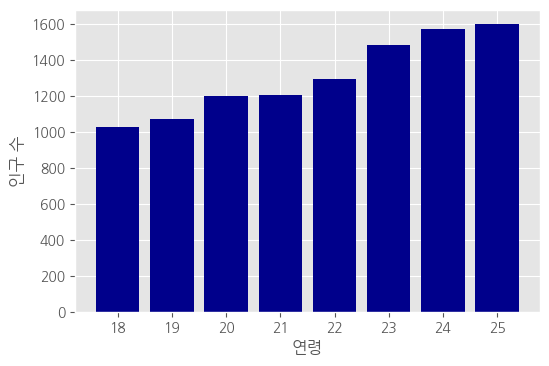

----------------------------------------------------------------------------------
1825 연령대의 인구 비율이 가장 높은 곳은 강원도 삼척시 도계읍입니다.
----------------------------------------------------------------------------------


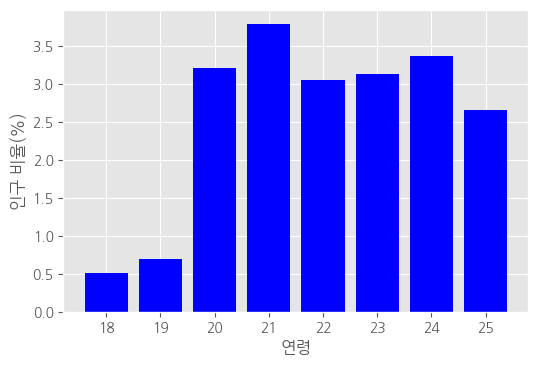

In [ ]:
# 초기 설정
import csv
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 데이터 불러오기
data = csv.reader(open('age2022.csv'))
next(data)
data = list(data)
print('특정 연령대가 가장 많은 지역을 확인합니다.')

## 연령대 입력 및 지역 확인
while True :
  age = input('연령대를 선택하십시오(1, 2, 3 중 숫자만 입력)\n[1: 1825/ 2: 2535/ 3: 3545] : ')
  mn = 500
  op = 0

# 1825 선택--------------------------------------------------------------------
  if age == '1' :
    x = []
    for i in range(18,26) :
      x.append(i)
    for row in data :
      S = 0
      s = 0
      for i in range(19, 27) :                        # 만 16~23세
        tmp = int(row[i])                             # 숫자 데이터
        S = S + tmp                                   # 숫자 합
        tmp_prop = int(row[i])/int(row[2])            # 비율 데이터
        s = s + tmp_prop                              # 비율 합
      if S > mn and row[0].split('(')[0][-1] in ['읍','면','동'] :  # 구나 시 단위는 숫자가 너무 크므로 작은 범위로 제한
        result = []
        for i in range(19, 27) :
          result.append(int(row[i]))
        result_name = row[0].split('(')[0]
        mn = S                                        # 최대값 업데이트
      if s > op :
        result_prop = []
        for i in range(19, 27) :
          result_prop.append(100 * int(row[i])/int(row[2])) # 퍼센트
        result_prop_name = row[0].split('(')[0]
        op = s

# 그래프 및 결과 도출
    print('----------------------------------------------------------------------------------')
    print(f'1825 연령대의 인구 수가 가장 많은 곳은 {result_name}입니다.')
    print('----------------------------------------------------------------------------------')      
    plt.figure(dpi = 100)
    plt.bar(x, result, color = 'darkblue')
    plt.xlabel('연령')
    plt.ylabel('인구 수')
    plt.show()

    print('----------------------------------------------------------------------------------') 
    print(f'1825 연령대의 인구 비율이 가장 높은 곳은 {result_prop_name}입니다.')
    print('----------------------------------------------------------------------------------')     
    plt.figure(dpi = 100)
    plt.bar(x, result_prop, color = 'blue')
    plt.xlabel('연령')
    plt.ylabel('인구 비율(%)')
    plt.show()
    break

# 2535 선택--------------------------------------------------------------------
  elif age == '2' :
    x = []
    for i in range(25,36) :
      x.append(i)
    for row in data :
      S = 0
      s = 0
      for i in range(26, 37) :                        # 만 23~33세
        tmp = int(row[i])                             
        S = S + tmp                                   
        tmp_prop = int(row[i])/int(row[2])            
        s = s + tmp_prop                              
      if S > mn and row[0].split('(')[0][-1] in ['읍','면','동'] : 
        result = []
        for i in range(26, 37) :
          result.append(int(row[i]))
        result_name = row[0].split('(')[0]
        mn = S
      if s > op :
        result_prop = []
        for i in range(26, 37) :
          result_prop.append(100 * int(row[i])/int(row[2])) 
        result_prop_name = row[0].split('(')[0]
        op = s

# 그래프 및 결과 도출
    print('----------------------------------------------------------------------------------')
    print(f'2535 연령대의 인구 수가 가장 많은 곳은 {result_name}입니다.')
    print('----------------------------------------------------------------------------------')      
    plt.figure(dpi = 100)
    plt.bar(x, result, color = 'darkblue')
    plt.xlabel('연령')
    plt.ylabel('인구 수')
    plt.show()

    print('----------------------------------------------------------------------------------') 
    print(f'2535 연령대의 인구 비율이 가장 높은 곳은 {result_prop_name}입니다.')
    print('----------------------------------------------------------------------------------')     
    plt.figure(dpi = 100)
    plt.bar(x, result_prop, color = 'blue')
    plt.xlabel('연령')
    plt.ylabel('인구 비율(%)')
    plt.show()
    break 

# 3545 선택--------------------------------------------------------------------
  elif age == '3' :
    x = []
    for i in range(35,46) :
      x.append(i)
    for row in data :
      S = 0
      s = 0
      for i in range(36, 47) :                        # 만 33~43세
        tmp = int(row[i])                             
        S = S + tmp                                   
        tmp_prop = int(row[i])/int(row[2])            
        s = s + tmp_prop                              
      if S > mn and row[0].split('(')[0][-1] in ['읍','면','동'] : 
        result = []
        for i in range(36, 47) :
          result.append(int(row[i]))
        result_name = row[0].split('(')[0]
        mn = S
      if s > op :
        result_prop = []
        for i in range(36, 47) :
          result_prop.append(100 * int(row[i])/int(row[2])) 
        result_prop_name = row[0].split('(')[0]
        op = s

# 그래프 및 결과 도출
    print('----------------------------------------------------------------------------------')
    print(f'3545 연령대의 인구 수가 가장 많은 곳은 {result_name}입니다.')
    print('----------------------------------------------------------------------------------')      
    plt.figure(dpi = 100)
    plt.bar(x, result, color = 'darkblue')
    plt.xlabel('연령')
    plt.ylabel('인구 수')
    plt.show()

    print('----------------------------------------------------------------------------------') 
    print(f'3545 연령대의 인구 비율이 가장 높은 곳은 {result_prop_name}입니다.')
    print('----------------------------------------------------------------------------------')     
    plt.figure(dpi = 100)
    plt.bar(x, result_prop, color = 'blue')
    plt.xlabel('연령')
    plt.ylabel('인구 비율(%)')
    plt.show()
    break 

# 입력 오류--------------------------------------------------------------------
  else :
    print('1, 2, 3 중 하나의 숫자로 입력해주십시오.')

### 2) 지역을 입력했을 때 타겟 연령대별 데이터를 출력하기

원하는 지역의 타겟 연령대별 데이터를 출력합니다.
타겟 연령대 : [1825, 2535, 3545, 1835, 2545]
각 연령대의 끝은 중복됩니다. ex) 25세는 1825와 2535에 모두 들어감
지역을 입력하세요. ex) 서울, 광진구, 둔산2동 : 둔산2동


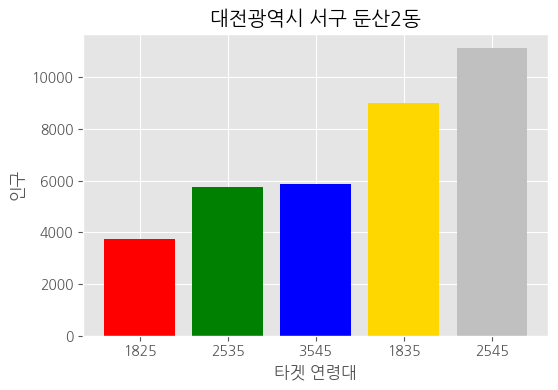

더 알아보시겠습니까? [네, 아니오] : 네
지역을 입력하세요. ex) 서울, 광진구, 둔산2동 : 동작구


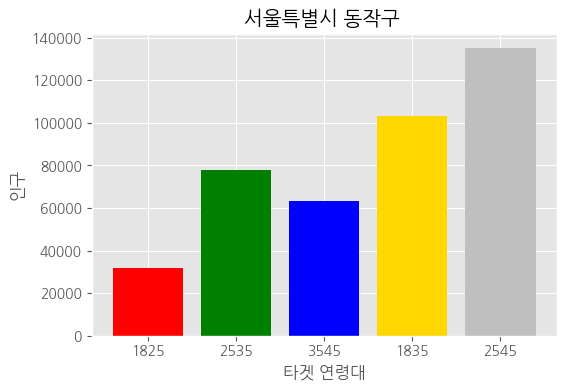

더 알아보시겠습니까? [네, 아니오] : 아니오


In [ ]:
# 초기 설정
import csv
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 데이터 불러오기
data = csv.reader(open('age2022.csv'))
next(data)
data = list(data)
print('원하는 지역의 타겟 연령대별 데이터를 출력합니다.\n타겟 연령대 : [1825, 2535, 3545, 1835, 2545]')
print('각 연령대의 끝은 중복됩니다. ex) 25세는 1825와 2535에 모두 들어감')

# 리스트 생성
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []

# 지역 입력 및 데이터처리
while True : 
  name = input('지역을 입력하세요. ex) 서울, 광진구, 둔산2동 : ')
  for row in data :
    if name in row[0] :
      for i in range(19, 27) :                        # 만 16~23세
        y1.append(int(row[i]))
      for i in range(26, 37) :                        # 만 23~33세
        y2.append(int(row[i]))
      for i in range(36, 47) :                        # 만 33~43세
        y3.append(int(row[i]))
      for i in range(19, 37) :                        # 만 16~33세
        y4.append(int(row[i]))
      for i in range(26, 47) :                        # 만 23~43세
        y5.append(int(row[i]))
      result_name = row[0].split('(')[0]
      break

  # 그래프 출력
  plt.figure(dpi = 100)
  plt.title(result_name)
  plt.xlabel('타겟 연령대')
  plt.ylabel('인구')
  x = ['1825', '2535', '3545', '1835', '2545']
  y = [sum(y1), sum(y2), sum(y3), sum(y4), sum(y5)]
  plt.bar(x, y, color = ['r','g','b','gold','silver'])
  plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # 제곱 형태로 출력되는 것 방지
  plt.show()

  # 리스트 초기화(반복 실행 고려)
  y1.clear()
  y2.clear()
  y3.clear()
  y4.clear()
  y5.clear()

  # 반복 실행 여부 결정
  time.sleep(2)
  r = '반복'
  while r not in ['네', '아니오'] :
    r = input('더 알아보시겠습니까? [네, 아니오] : ')
    if r not in ['네', '아니오'] :
      print('네, 아니오 둘 중 하나로 대답해주시기 바랍니다.')
  if r == '아니오' :
    break

In [ ]:
a, b = input('두 숫자를 , 로 구분하여 입력하세요 : ').split(',')
print(a+b)

두 숫자를 , 로 구분하여 입력하세요 : 2,3
23


# *4. 10년 후 학생 수 변화 예측*
- 2012년과 2022년의 초등학생 각 학년 학생 수를 비교해보고 각 학년별 학생 수 변화 비율에 맞추어 2032년 초등학생 각 학년 수를 예측한다.
- 두두두두두두둥님 과제 활용
https://colab.research.google.com/drive/1ewsPrHO_ldz3s_RGOdSe-zH_GwZOCpIq?usp=sharing

10년 동안의 학생 수 변화를 통해 10년 후의 학생 수를 예측해봅시다.
학생 수 변화가 궁금한 지역의 이름을 입력해주세요 ex) 서울, 중랑구 : 탄방동
------------------------------------------------------------------------
다음은 대전광역시 서구 탄방동의 2032년도 초등학생 수 예측 결과입니다.
2012년도 학생 수는 1~6학년 순으로 [222, 240, 276, 249, 321, 341]명이고,
2022년도 학생 수는 1~6학년 순으로 [203, 162, 161, 195, 185, 203]명이므로,
2032년도 학생 수는 1~6학년 순으로 [186, 109, 94, 153, 107, 121]명이 될 것으로 예측할 수 있습니다.
이하는 그래프입니다


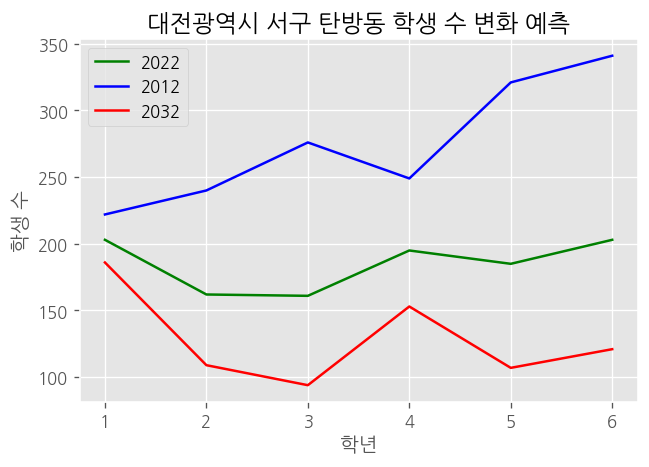

In [ ]:
# 초기 설정
import csv
import matplotlib.pyplot as plt
plt.figure(dpi = 120)
plt.style.use('ggplot')
plt.xlabel('학년')
plt.ylabel('학생 수')

# 데이터 불러오기
data1 = csv.reader(open('age2022.csv'))
data2 = csv.reader(open('age2012.csv'))
next(data1)
next(data2)
data1 = list(data1)
data2 = list(data2)
print('10년 동안의 학생 수 변화를 통해 10년 후의 학생 수를 예측해봅시다.')

# 리스트 생성
student_2022 = []
student_2012 = []
student_2032 = []

# 지역 입력 및 과거 데이터 완성
name = input('학생 수 변화가 궁금한 지역의 이름을 입력해주세요 ex) 서울, 중랑구 : ')
for row in data1 :            # 2022년 인구데이터에서
  if name in row[0] :         # 입력한 지역에 해당하는 자료를 찾아
    for i in range(9, 15) :   # 1 ~ 6학년 학생 수 리스트에 입력(만6세~만11세)
      student_2022.append(int(row[i]))
    name = row[0].split('(')[0]  # 법정지역명칭 사용, 숫자부분 삭제
    break

for row in data2 :               # 2012년 인구데이터 자료
  if name in row[0] :
    for i in range(9, 15) :
      student_2012.append(int(row[i]))
    break

# 미래 학생 수 변화 예측
for i in range(0, 6) :
  student_2032.append(round((int(student_2022[i]) / int(student_2012[i])) * int(student_2022[i])))
  # 학생 수 변화 비율(2022년 학생수 / 2012년 학생수)과 2022년 학생수를 곱함

# 그래프 및 결과 도출
print('------------------------------------------------------------------------')
print(f'다음은 {name}의 2032년도 초등학생 수 예측 결과입니다.')
print(f'2012년도 학생 수는 1~6학년 순으로 {student_2012}명이고,')
print(f'2022년도 학생 수는 1~6학년 순으로 {student_2022}명이므로,')
print(f'2032년도 학생 수는 1~6학년 순으로 {student_2032}명이 될 것으로 예측할 수 있습니다.')
print('이하는 그래프입니다')
x = [1,2,3,4,5,6]
plt.title(f'{name} 학생 수 변화 예측')
plt.plot(x, student_2022, c = 'green', label = '2022')
plt.plot(x, student_2012, c = 'blue', label = '2012')
plt.plot(x, student_2032, c = 'red', label = '2032')
plt.legend()
plt.show()

# **5. 데이터 분석 및 해석**
### 1) 인구구조 비교
- 분석이라고 거창하게 말하기엔 민망하지만.. 쓰임새를 이야기한다고 해 두자.

> #### (1) 지역 간의 인구구조 차이를 연령대별로 볼 수 있다.
 - 서울과 강원도를 비교해보면 20대 후반, 60대 초반, 70대 후반에서 인구 비율의 차이가 도드라진다.
 - 그래프를 x축 양의 방향으로 평행이동하면 생산가능인구가 점점 줄어들 것을 예상할 수 있는데, 막연하게만 알고 있던 인구 문제가 크게 와닿는다.
 - 농촌 지역부터 문제가 크게 발생할 것이고, 결국엔 우리나라 전체로 번지게 될 것이다.

> #### (2) 인구구조가 유사한 지역은 굉장히 유사함을 알 수 있다.
 - 특정 도시(A라고 하자)와 인구구조가 유사한 과거의 다른 도시 모습, 현재의 다른 도시 모습을 보면서 A에 생길 수 있는 문제들을 미리 예상할 수 있고, 성공적이었던 해결책은 무엇이 있는가, 아쉬웠던 해결책에는 무엇이 있는가 등을 봄으로써 미래를 대비할 수 있다.
 - 사업을 하는 사람들은 경제적인 차원에서도 여러 가지를 생각할 수 있을 것 같다.

### 2) 특정 연령대가 가장 많은 지역 확인
- csv 파일에 행정단위의 크기와 관계 없이 데이터들이 다 들어있기 때문에, 그냥 숫자로 비교하면 당연히 서울특별시가 나올 것 같아 인구 수로 비교하는 경우에는 [읍, 면, 동]으로 제한을 두었다.

> #### (1) 인구 수로 비교하는 경우
 - 1825와 2535 둘 모두 경기도 부천시 신중동이 나왔다. (부천의 구 단위가 폐지되면서 동 단위가 커져서 그런걸까?)   
 3545는 경상남도 양산시 물금읍이 나왔다. 이렇게 시 다음에 바로 동이 나오는 경우는 인구 수가 클 수 밖에 없는 것 같다.

> #### (2) 인구 비율로 비교하는 경우
 - 1825는 강원도 삼척시 도계읍이 나왔다. 20대 초중반 비율이 매우 높다(3퍼센트 정도씩 됨). 전체 인구는 9856 명 밖에 되지 않지만, 젊은 층의 비율이 매우 높아 뭔가 활기를 띄는 지역일 것 같다.  
 2535는 서울특별시 관악구 신림동이 나왔다. 아무래도 고시촌 때문에 그런 것 같다.  
 3545는 경상북도 구미시 산동읍이 나왔다. 전체 인구가 27008 명인 도시이며, 자녀를 가진 부모가 많이 있는 지역인 것 같다(산동읍의 인구를 그래프로 그려 보면 0 ~ 10 세 인구와 30 ~ 45 세 인구가 많다).

### 3) 학생 수 변화 예측
- 학생 수가 감소함을 잘 볼 수 있다. 많은 학교들이 사라지게 될 것 같다.
- 다른 지역은 대부분 감소하는 모습을 보이는데, 경기도는 증가하는 추세의 학년이 절반이나 된다.
- 변화율이 일정하다고 가정하고 계산했는데, 실제 연구자들은 어떤 식을 이용해 예측하는지 궁금하다.